### Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, f1_score,classification_report, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

### Load Data

In [2]:
# load train dataset
train= pd.read_csv('bank-full.csv', sep=';')

# load test dataset
test= pd.read_csv('bank.csv', sep=';')

In [3]:
# rename target variable
train.rename(columns={'y': 'subscribe'}, inplace= True)
test.rename(columns={'y': 'subscribe'}, inplace= True)

# label_encoding
label_encoder = LabelEncoder()

train['subscribe'] = label_encoder.fit_transform(train['subscribe'])
test['subscribe'] = label_encoder.fit_transform(test['subscribe'])

In [4]:
# take a look at the first 5 rows of training dataset
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [5]:
# take a look at the first 5 rows of testing dataset
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [6]:
# get some info about the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  subscribe  45211 non-null  int32 
dtypes: int32(1), int64(7), object(9)
memory usage: 5.7+ MB


In [7]:
print(f'train: {train.shape[0]} rows and {train.shape[1]} columns')
print(f'test: {test.shape[0]} rows and {test.shape[1]} columns')

train: 45211 rows and 17 columns
test: 4521 rows and 17 columns


### Exploratory Data Analysis (EDA)

In [8]:
# descriptive statistics
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
subscribe,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


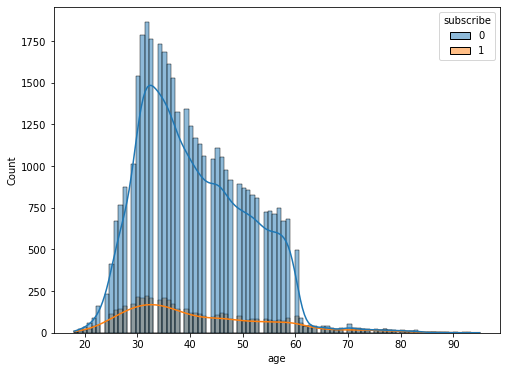

In [9]:
# age distribution
plt.figure(figsize= (8,6))
sns.histplot(data=train,  x= 'age', hue='subscribe', kde= True);

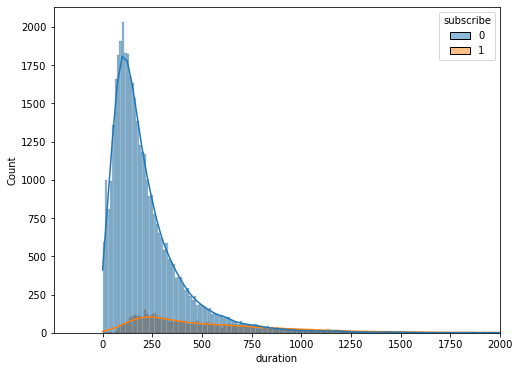

In [10]:
# duration
plt.figure(figsize= (8,6))
sns.histplot(data=train, x= 'duration', hue= 'subscribe', kde= True)
plt.xlim(right= 2000);


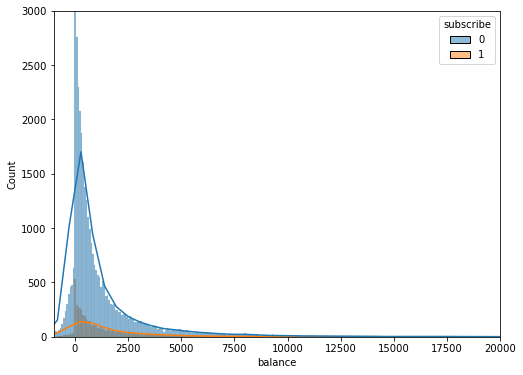

In [11]:
# balance
plt.figure(figsize= (8,6))
sns.histplot(data=train, x= 'balance', hue= 'subscribe', kde= True)
plt.xlim(left= - 1000, right= 20000)
plt.ylim(top= 3000);

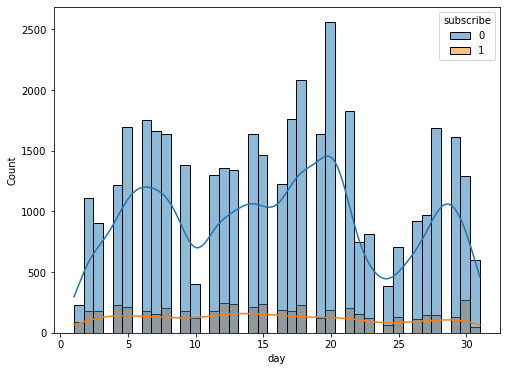

In [12]:
# month
plt.figure(figsize= (8,6))
sns.histplot(data=train,  x= 'day', hue='subscribe', kde= True);

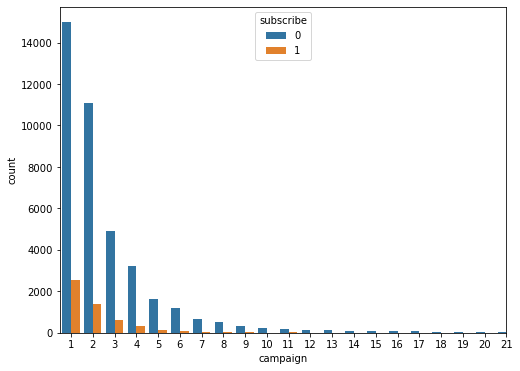

In [13]:
# campaign
plt.figure(figsize= (8,6))
sns.countplot(data=train,  x= 'campaign', hue='subscribe')
plt.xlim(right= 20);


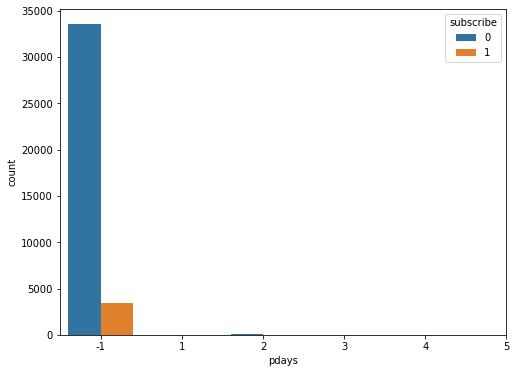

In [14]:
# pdays
plt.figure(figsize= (8,6))
sns.countplot(data=train,  x= 'pdays', hue='subscribe')
plt.xlim(right= 5);

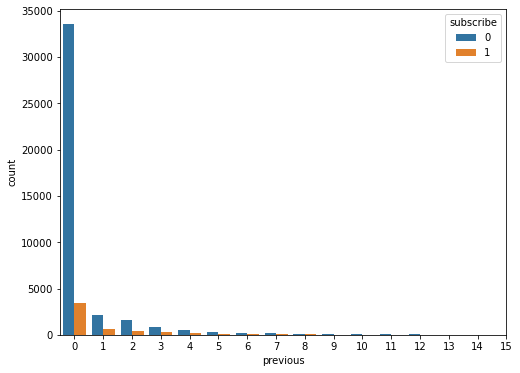

In [15]:
# previous
plt.figure(figsize= (8,6),)
sns.countplot(data=train,  x= 'previous', hue='subscribe' )
plt.xlim(right= 15);

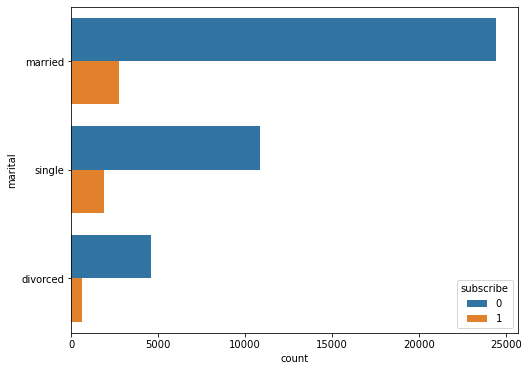

In [16]:
# marital status
plt.figure(figsize= (8,6))
sns.countplot(data=train,  y= 'marital', hue='subscribe', orient='v');

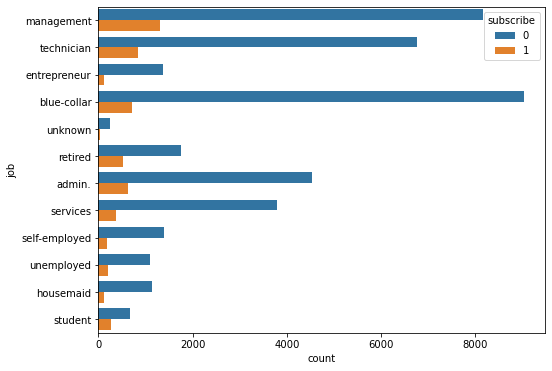

In [17]:
# job 
plt.figure(figsize= (8,6))
sns.countplot(data=train,  y= 'job', hue='subscribe', orient='v');

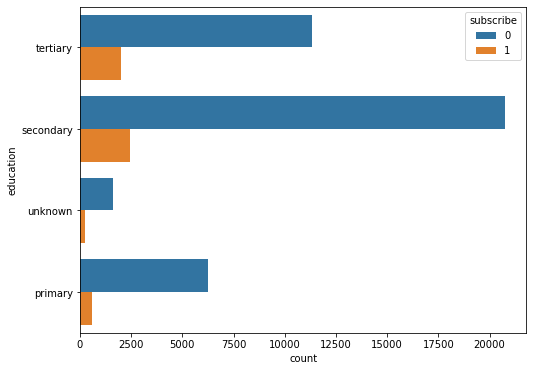

In [18]:
# education
plt.figure(figsize= (8,6))
sns.countplot(data=train,  y= 'education', hue='subscribe', orient='v');

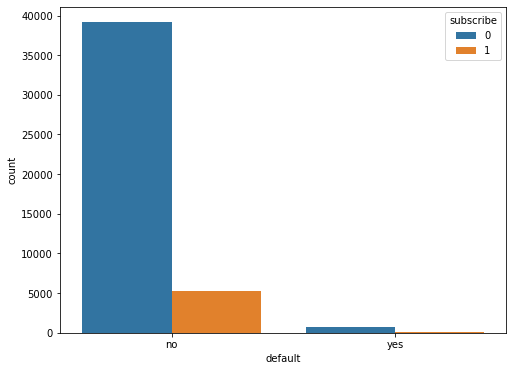

In [19]:
# default
plt.figure(figsize= (8,6))
sns.countplot(data=train,  x= 'default', hue='subscribe');

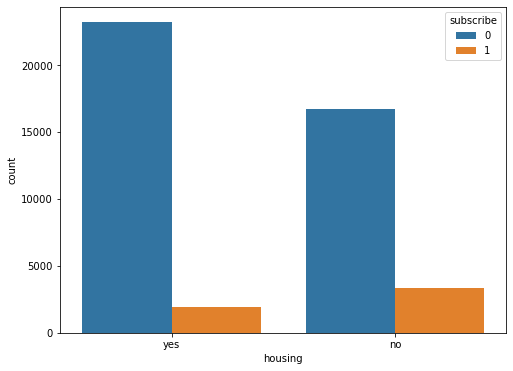

In [20]:
# housing
plt.figure(figsize= (8,6))
sns.countplot(data=train,  x= 'housing', hue='subscribe');

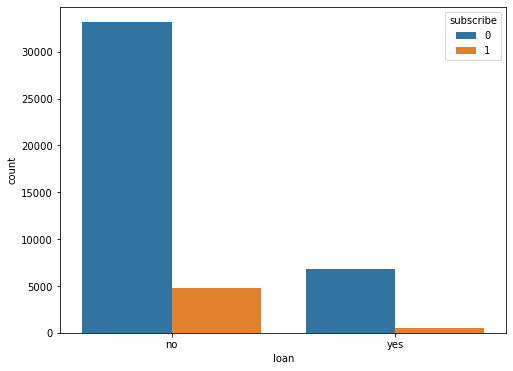

In [21]:
# loan
plt.figure(figsize= (8,6))
sns.countplot(data=train,  x= 'loan', hue='subscribe');

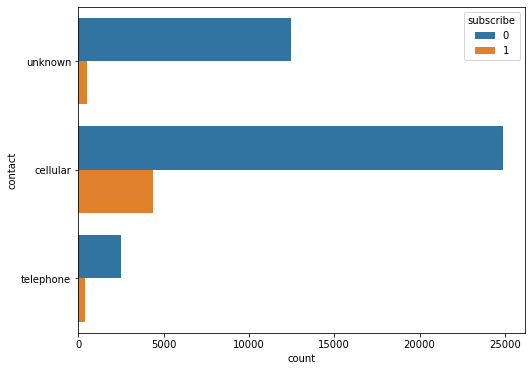

In [22]:
# contact
plt.figure(figsize= (8,6))
sns.countplot(data=train,  y= 'contact', hue='subscribe', orient='v');

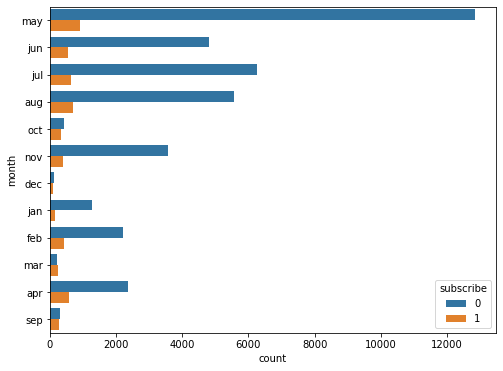

In [23]:
# month
plt.figure(figsize= (8,6))
sns.countplot(data=train,  y= 'month', hue='subscribe', orient='v');

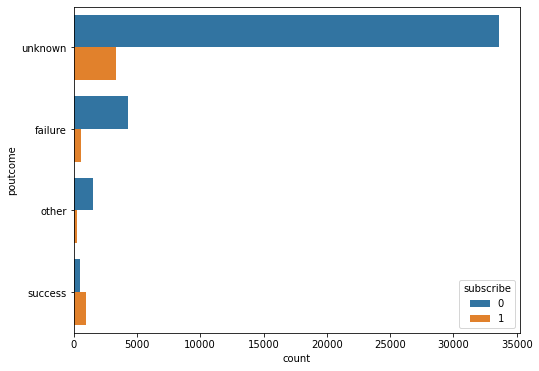

In [24]:
# poutcome
plt.figure(figsize= (8,6))
sns.countplot(data=train,  y= 'poutcome', hue='subscribe', orient='v');

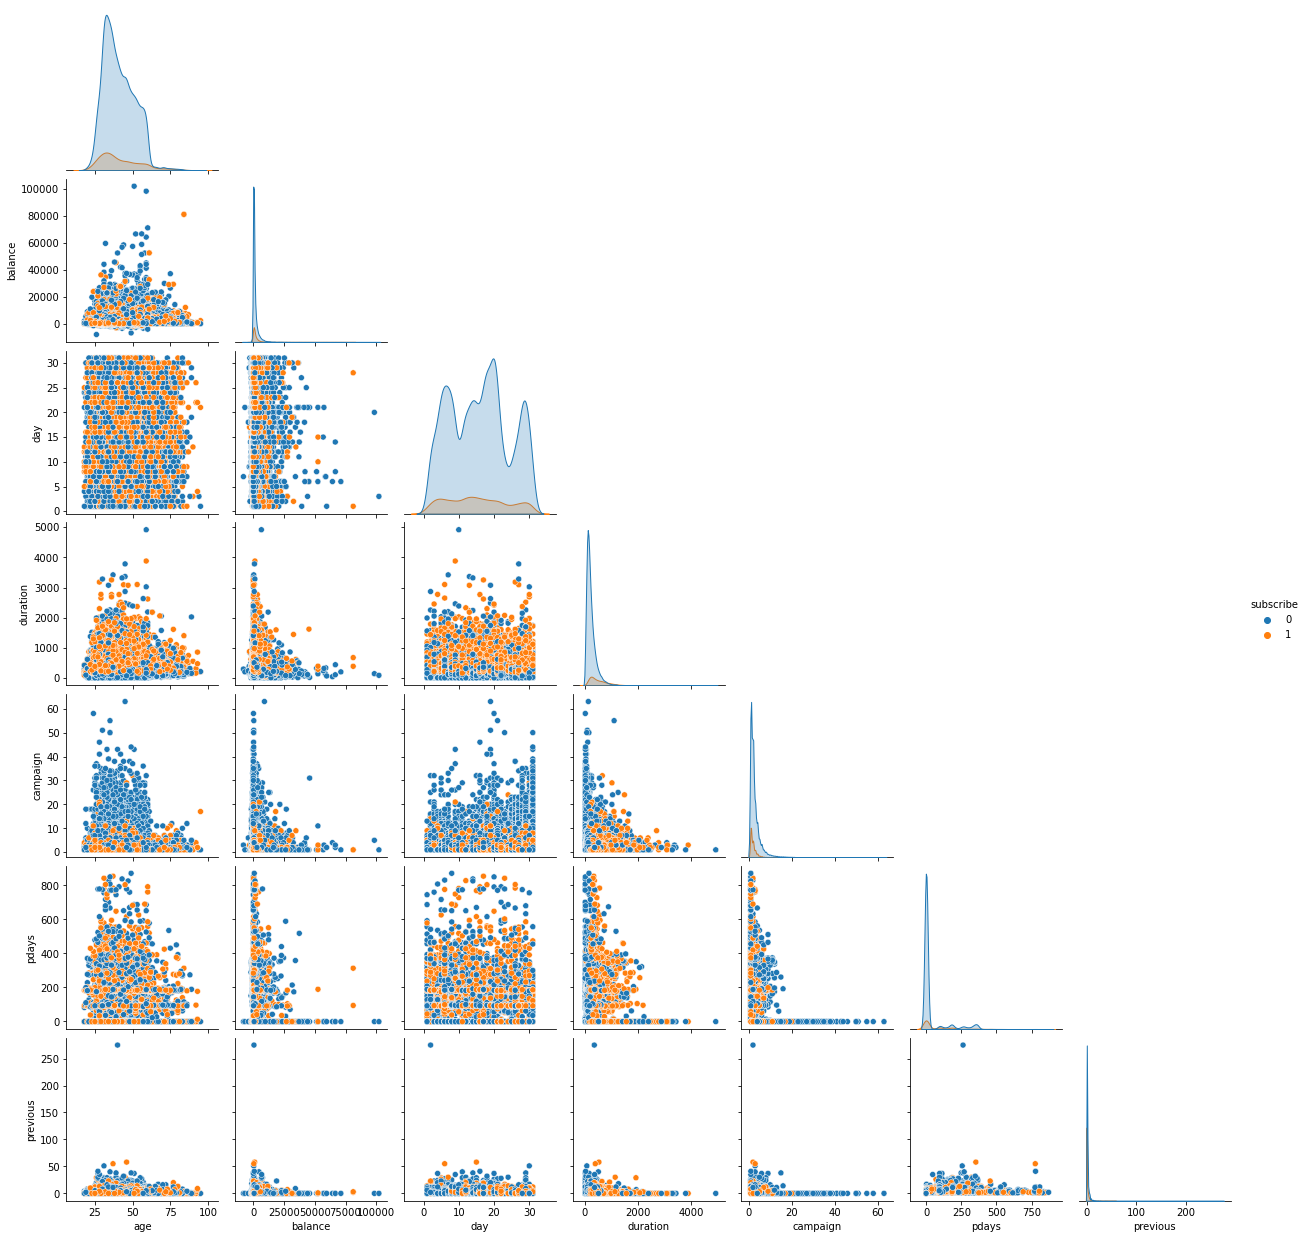

In [25]:
#pairwise comparison of numeric features
sns.pairplot(train, hue='subscribe',corner=True);

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'balance'),
  Text(0, 2.5, 'day'),
  Text(0, 3.5, 'duration'),
  Text(0, 4.5, 'campaign'),
  Text(0, 5.5, 'pdays'),
  Text(0, 6.5, 'previous'),
  Text(0, 7.5, 'subscribe')])

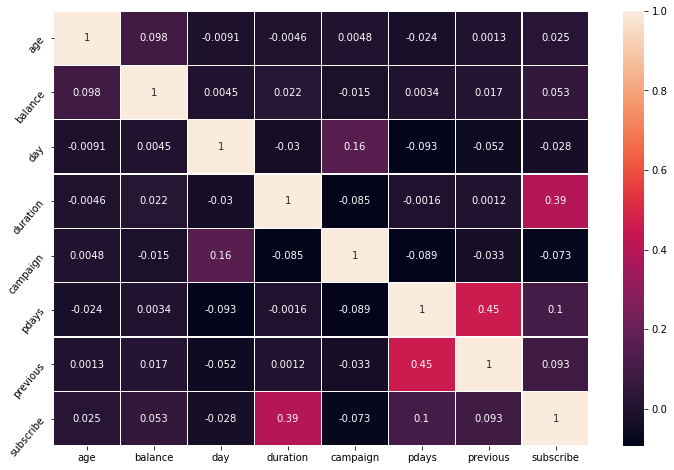

In [26]:
#correlation between numeric features
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), annot=True, linewidths=0.5)
plt.yticks(rotation=50)

## Data Cleaning

In [27]:
# check null values
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
subscribe    0
dtype: int64

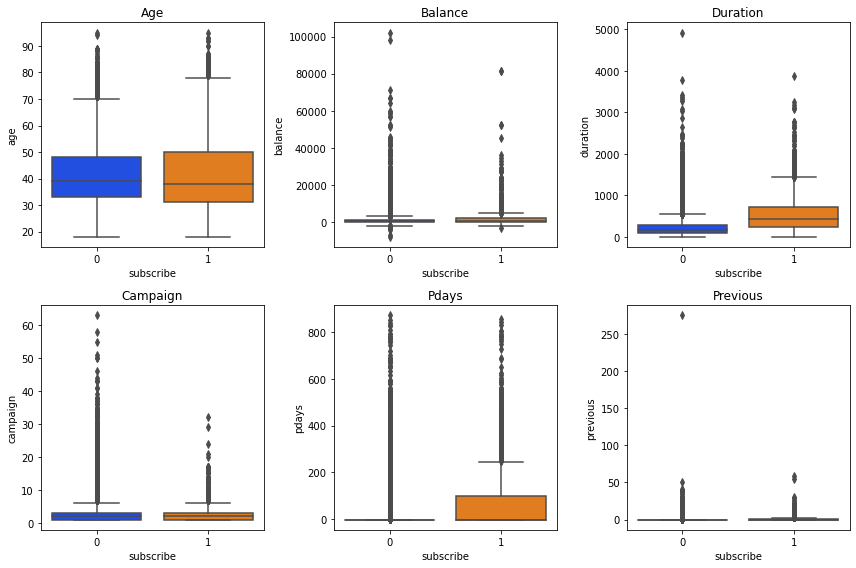

In [28]:
#handling extreme outliers
fig, axes= plt.subplots(2,3, figsize=(12,8))

sns.boxplot(data=train, ax=axes[0,0], x= 'subscribe', y='age', palette= 'bright')
sns.boxplot(data=train, ax=axes[0,1], x= 'subscribe', y= 'balance',palette= 'bright')
sns.boxplot(data=train, ax=axes[0,2], x= 'subscribe', y= 'duration', palette= 'bright')
sns.boxplot(data=train, ax=axes[1,0], x= 'subscribe', y='campaign', palette= 'bright')
sns.boxplot(data=train, ax=axes[1,1], x= 'subscribe', y= 'pdays', palette= 'bright')
sns.boxplot(data=train, ax=axes[1,2], x= 'subscribe', y= 'previous', palette= 'bright');

axes[0,0].set_title('Age')
axes[0,1].set_title('Balance')
axes[0,2].set_title('Duration')
axes[1,0].set_title('Campaign')
axes[1,1].set_title('Pdays')
axes[1,2].set_title('Previous')

plt.tight_layout()


In [29]:
# remove rows with balance values greater than 50000

train= train[train['balance'] < 40000]
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


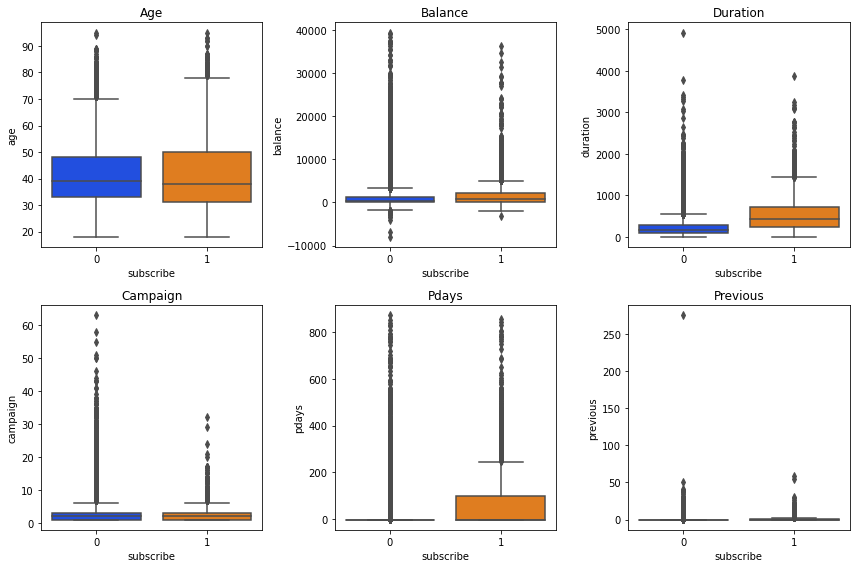

In [30]:
# features after removing extreme outliers
fig, axes= plt.subplots(2,3, figsize=(12,8))

sns.boxplot(data=train, ax=axes[0,0], x= 'subscribe', y='age', palette= 'bright')
sns.boxplot(data=train, ax=axes[0,1], x= 'subscribe', y= 'balance',palette= 'bright')
sns.boxplot(data=train, ax=axes[0,2], x= 'subscribe', y= 'duration', palette= 'bright')
sns.boxplot(data=train, ax=axes[1,0], x= 'subscribe', y='campaign', palette= 'bright')
sns.boxplot(data=train, ax=axes[1,1], x= 'subscribe', y= 'pdays', palette= 'bright')
sns.boxplot(data=train, ax=axes[1,2], x= 'subscribe', y= 'previous', palette= 'bright');

axes[0,0].set_title('Age')
axes[0,1].set_title('Balance')
axes[0,2].set_title('Duration')
axes[1,0].set_title('Campaign')
axes[1,1].set_title('Pdays')
axes[1,2].set_title('Previous')

plt.tight_layout()

### Handling Imbalance Class

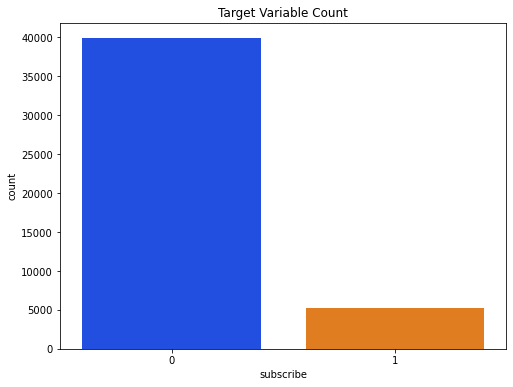

In [31]:
# check imbalance class
plt.figure(figsize= (8,6))
sns.countplot(data= train, x= 'subscribe', palette='bright')
plt.title('Target Variable Count');


### Method 1: Oversample minority class < subscribe == 'yes'>

In [32]:
yes= train[train['subscribe']== 1]
no= train[train['subscribe']== 0]

# oversample minority --yes
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=42) 

# combine majority and oversampled minority
train_oversampled = pd.concat([yes_oversampled, no]).reset_index(drop=True)

# check new class counts
train_oversampled['subscribe'].value_counts()


1    39899
0    39899
Name: subscribe, dtype: int64

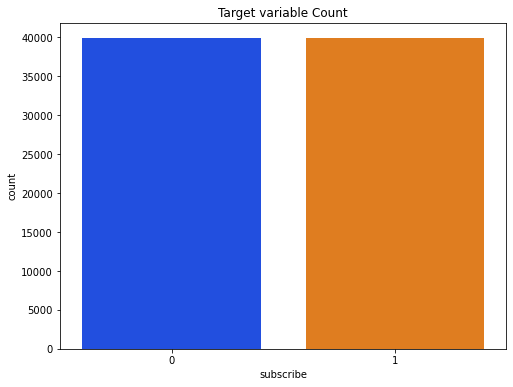

In [33]:
plt.figure(figsize= (8,6))
sns.countplot(data= train_oversampled, x= 'subscribe', palette='bright')
plt.title('Target variable Count');

### Method 2: Undersample majority class < subscribe == 'no'>

In [34]:
# undersample majorities --no
no_undersampled = resample(no, replace=False, n_samples=len(yes), random_state=42) 

# combine minority and undersampled majority
train_undersampled = pd.concat([no_undersampled, yes]).reset_index(drop=True)

# check new class counts
train_undersampled['subscribe'].value_counts()

0    5284
1    5284
Name: subscribe, dtype: int64

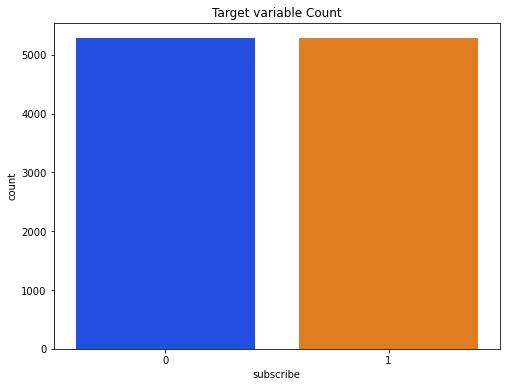

In [35]:
plt.figure(figsize= (8,6))
sns.countplot(data= train_undersampled, x= 'subscribe', palette='bright')
plt.title('Target variable Count');

In [36]:
# final data for training
train=train_oversampled.copy()

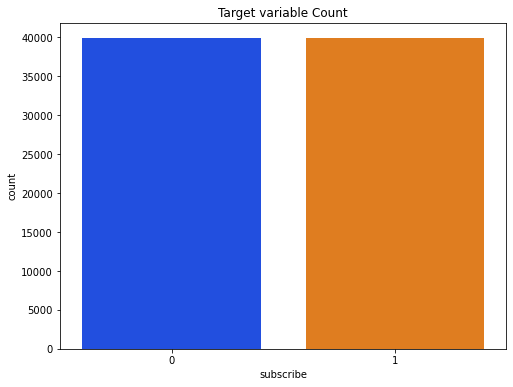

In [37]:
plt.figure(figsize= (8,6))
sns.countplot(data= train, x= 'subscribe', palette='bright')
plt.title('Target variable Count');

## Split Dataset

In [38]:
X_train= train.drop('subscribe', axis= 1)
y_train= train['subscribe']
X_test= test.drop('subscribe', axis= 1)
y_test= test['subscribe']

### One-Hot Encoding

In [39]:
# features encoding
X_train= pd.get_dummies(X_train)
X_test= pd.get_dummies(X_test)


In [40]:
#Renaming the columsns by replacing special characters with underscore
X_train.columns = [ col.replace('.', '_') for col in X_train.columns]
X_train.columns = [ col.replace('-', '_') for col in X_train.columns]

X_test.columns = [ col.replace('.', '_') for col in X_test.columns]
X_test.columns = [ col.replace('-', '_') for col in X_test.columns]

### Features Scaling

In [41]:
scaler= StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

### Model Development, Selection and Evaluation

#### Gaussian Naive Bayes Classifier

In [42]:
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

# predict test
gnb_pred = gnb.predict(X_test)

#pred train
gnb_train = gnb.predict(X_train)


In [43]:
# print accuracy score
print(f'Train Accuracy: {accuracy_score(y_train, gnb_train)}')
print(f'Test Accuracy: {accuracy_score( y_test, gnb_pred)}')

Train Accuracy: 0.7240407027745056
Test Accuracy: 0.8190665781906658


In [44]:
# classification metrixs -percision, recall, f1-score, support

print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      4000
           1       0.33      0.56      0.42       521

    accuracy                           0.82      4521
   macro avg       0.63      0.71      0.65      4521
weighted avg       0.87      0.82      0.84      4521



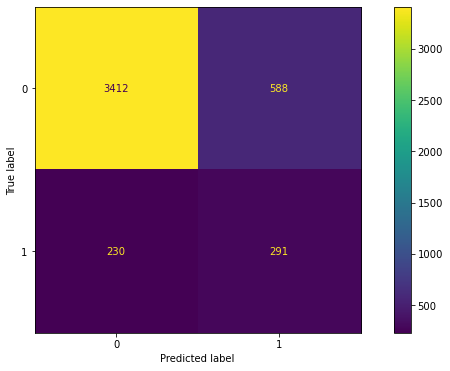

In [45]:
# visualize confusion matrix
fig, ax = plt.subplots(figsize=(12, 6))
ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test, ax= ax);

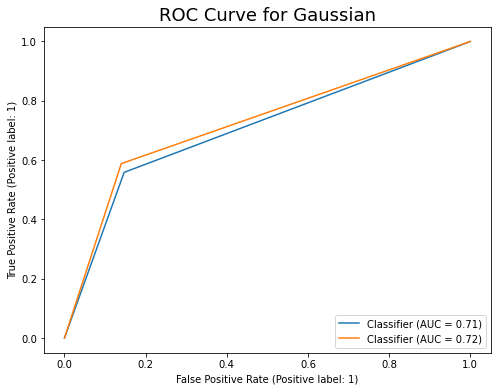

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.title('ROC Curve for Gaussian', fontsize=18)
RocCurveDisplay.from_predictions(y_test,gnb_pred, ax=ax)
RocCurveDisplay.from_predictions(y_train, gnb_train, ax=ax);

#### Logistics Regression

In [47]:
# instantiate the model
lrc= LogisticRegression(C= 0.1)

# fit the model
lrc.fit(X_train, y_train)

# predict class
lrc_pred= lrc.predict(X_test)

#pred train
lrc_train = lrc.predict(X_train)

In [48]:
# print accuracy score
print(f'Train accuracy: {accuracy_score(y_train, lrc_train)}')
print(f'Test accuracy: {accuracy_score(y_test, lrc_pred)}')


Train accuracy: 0.8326775107145542
Test accuracy: 0.8349922583499226


In [49]:
# classification metrixs -percision, recall, f1-score, support

print(classification_report(y_test, lrc_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      4000
           1       0.39      0.80      0.53       521

    accuracy                           0.83      4521
   macro avg       0.68      0.82      0.71      4521
weighted avg       0.90      0.83      0.86      4521



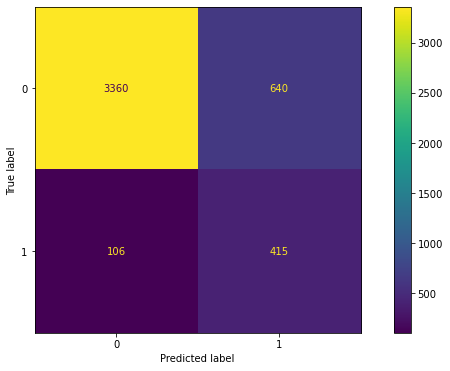

In [50]:
# visualize confusion matrix
fig, ax = plt.subplots(figsize=(12, 6))
ConfusionMatrixDisplay.from_estimator(lrc, X_test, y_test, ax= ax);

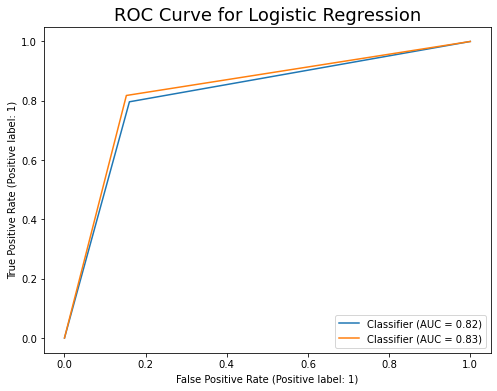

In [51]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.title('ROC Curve for Logistic Regression', fontsize=18)
RocCurveDisplay.from_predictions(y_test,lrc_pred, ax=ax)
RocCurveDisplay.from_predictions(y_train,lrc_train, ax=ax);

#### Random Forest Classifier

In [52]:
# instantiate the model
rfc = RandomForestClassifier(n_estimators=10)

# fit the model
rfc.fit(X_train, y_train)

# predict class
rfc_pred = rfc.predict(X_test)

#pred train
rfc_train = rfc.predict(X_train)

In [53]:
# print accuracy scores on training and test set

print(f'Train accuracy: {accuracy_score(y_train, rfc_train)}')
print(f'Test accuracy: {accuracy_score(y_test, rfc_pred)}')


Train accuracy: 0.9996115190856913
Test accuracy: 0.9993364299933643


In [54]:
# classification metrixs -percision, recall, f1-score, support

print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       0.99      1.00      1.00       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521



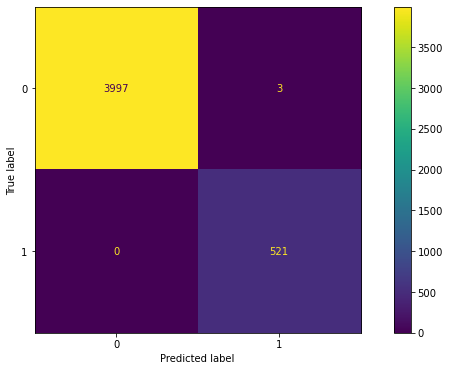

In [55]:
# visualize confusion matrix
fig, ax = plt.subplots(figsize=(12, 6))
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test, ax= ax);

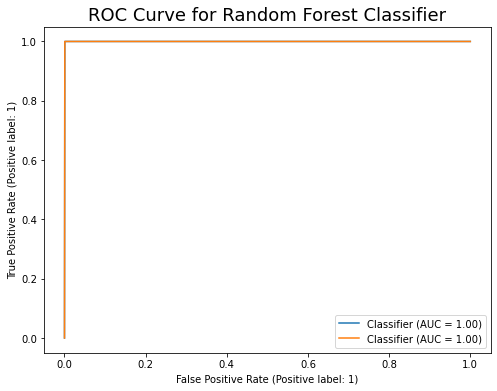

In [56]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.title('ROC Curve for Random Forest Classifier', fontsize=18)
RocCurveDisplay.from_predictions(y_test,rfc_pred, ax=ax)
RocCurveDisplay.from_predictions(y_train,rfc_train, ax=ax);

#### KNN

In [57]:
# instantiate the model
knn= KNeighborsClassifier()

# fit the model
knn.fit(X_train, y_train)

# predict class
knn_pred= knn.predict(X_test)

#pred train
knn_train = knn.predict(X_train)

In [58]:
# print accuracy scores on training and test set
print(f'Train ccuracy: {accuracy_score(y_train, knn_train)}')
print(f'Test ccuracy: {accuracy_score(y_test, knn_pred)}')


Train ccuracy: 0.9462267224742474
Test ccuracy: 0.9066578190665782


In [59]:
# classification metrixs -percision, recall, f1-score, support
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94      4000
           1       0.55      0.99      0.71       521

    accuracy                           0.91      4521
   macro avg       0.78      0.94      0.83      4521
weighted avg       0.95      0.91      0.92      4521



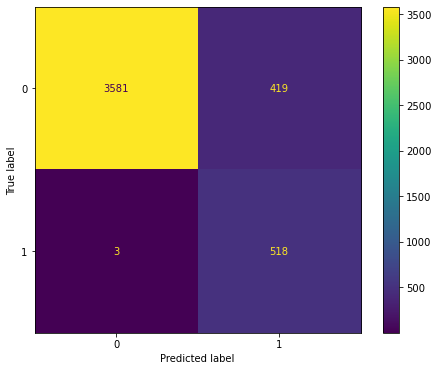

In [60]:
# visualize confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, ax= ax);


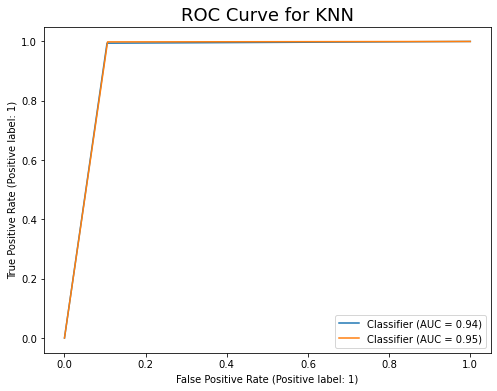

In [61]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.title('ROC Curve for KNN', fontsize=18)
RocCurveDisplay.from_predictions(y_test, knn_pred, ax=ax)
RocCurveDisplay.from_predictions(y_train, knn_train, ax=ax);

## Random Forest Classifier is selected as a final model 